# Support Vector Machine 
## Introduction
Support Vector Machines (SVMs) are a powerful supervised learning algorithm widely used for classification and regression tasks. SVMs gained popularity for their ability to handle high-dimensional data effectively and create robust decision boundaries between classes. The main goal of an SVM is to find a hyperplane that maximally separates data points of different classes. By maximizing the distance, or "margin," between this hyperplane and the nearest data points of each class (known as "support vectors"), SVMs aim to create a classifier that generalizes well to unseen data.

## Explanation of the Algorithm in Python
### Import the libraries
Import the necessary libraries like numpy, pandas, and matplotlib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the dataset
We load a dataset containing features `x1`, `x2`, and a `label` column that indicates the class.

In [3]:
data = pd.read_csv(r"C:\Users\arsha\OneDrive - Manipal Academy of Higher Education\Desktop\Cryptonite\Sample_Datasets\svm_linear_dataset.csv")
X = data[['x1', 'x2']].values
Y = data['label'].values

### Visualize the data
Below, we plot the points based on their labels for a clear distinction between classes.

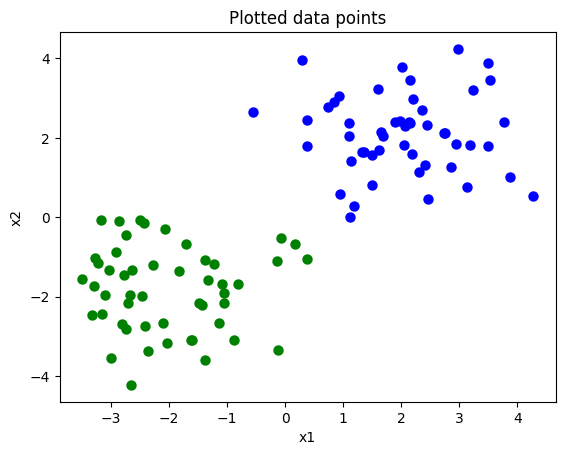

In [4]:
for i in range(len(X)):
    if Y[i] == -1:
        plt.scatter(X[i][0], X[i][1], s=30, color='green', marker='o', linewidths=2)
    else:
        plt.scatter(X[i][0], X[i][1], s=30, color='blue', marker='o', linewidths=2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Plotted data points")
plt.show()

### Define SVM Parameters
- `learning_rate`: The rate at which the model adjusts the weights.
- `epochs`: Number of times we iterate over the dataset.
- `C`: Regularization parameter, which helps control overfitting.

In [5]:
learning_rate = 0.001
epochs = 10000
C = 1 
w = np.zeros(len(X[0])) 
b = 0 

### Train SVM Model
The function `train_svm` uses SGD to adjust weights and bias based on misclassified points.

In [6]:
def train_svm(X, Y, learning_rate, epochs, C):
    global w, b
    for epoch in range(epochs):
        for i in range(len(X)):
            if Y[i] * (np.dot(X[i], w) + b) < 1:
                w = w + learning_rate * (X[i] * Y[i] + (-2 * (1 / epochs) * w))
                b = b + learning_rate * Y[i]
            else:
                w = w + learning_rate * (-2 * (1 / epochs) * w)
    return w, b

w, b = train_svm(X, Y, learning_rate, epochs, C)
print("Weights:", w)
print("Bias:", b)

Weights: [1.18684677 1.28240556]
Bias: -0.34400000000000025


### Plot Decision Boundary and Margins
After training the SVM, we plot the decision boundary and margins.

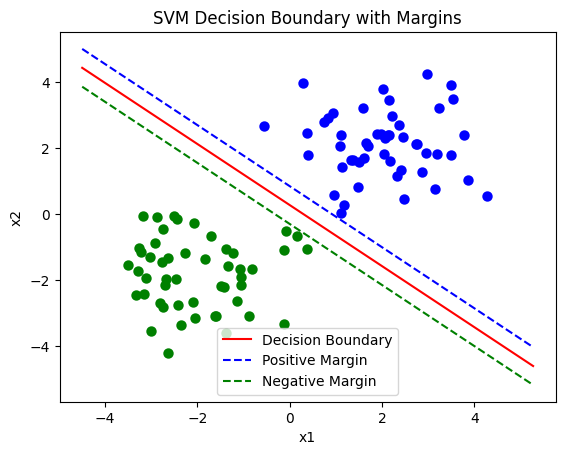

In [7]:
for i in range(len(X)):
    if Y[i] == -1:
        plt.scatter(X[i][0], X[i][1], s=30, color='green', marker='o', linewidths=2)
    else:
        plt.scatter(X[i][0], X[i][1], s=30, color='blue', marker='o', linewidths=2)

x1 = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
x2 = -(w[0] * x1 + b) / w[1]
plt.plot(x1, x2, 'r-', label="Decision Boundary")
margin = 1 / np.sqrt(np.sum(w ** 2))
x2_positive_margin = x2 + margin
x2_negative_margin = x2 - margin
plt.plot(x1, x2_positive_margin, 'b--', label="Positive Margin")
plt.plot(x1, x2_negative_margin, 'g--', label="Negative Margin")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM Decision Boundary with Margins")
plt.show()


# Theory for Linear SVM

Support Vector Machines (SVMs) are powerful supervised learning models used for classification and regression tasks. Linear SVM aims to find a hyperplane that separates data points belonging to different classes while maximizing the margin between the closest points of both classes.  
Consider the following figure, in which x’s represent positive training examples, o’s denote negative training examples, a decision boundary (this is the line given by the equation θ$^T$ x = 0, and is also called the separating hyperplane) is also shown, and three points have also been labeled A, B and C.  
![s13462611142024](https://a.okmd.dev/md/6735b1dd43279.png)    
Notice that the point A is very far from the decision boundary. If we are asked to make a prediction for the value of y at A, it seems we should be quite confident that y = 1 there. Conversely, the point C is very close to the decision boundary, and while it’s on the side of the decision boundary on which we would predict y = 1, it seems likely that just a small change to the decision boundary could easily have caused out prediction to be y = 0. Hence, we’re much more confident about our prediction at A ...

### Defining Parameters
From now, we’ll use y ∈ {−1, 1} to denote the class labels. Also, rather than parameterizing our linear classifier with the vector θ, we will use parameters w, b, and write our classifier as
$$
h_{w,b}(x) = g(w^T x + b)
$$
Here, g(z) = 1 if z ≥ 0, and g(z) = −1 otherwise.

### Functional Margin
Let’s formalize the notions of the functional and geometric margins. Given a training example (x $^{(i)}$, y $^{(i)}$), we define the functional margin of (w, b) with respect to the training example as
$$
\hat{\gamma}^{(i)} = y^{(i)} \left( w^T x^{(i)} + b \right)
$$
For a linear classifier with the decision function $g$ (values in $\{-1, 1\}$), the functional margin is not a reliable measure of confidence. This is because:

- If we replace $w$ with $2w$ and $b$ with $2b$, the decision function $g(w^T x + b)$ remains unchanged:  
  $$ g(w^T x + b) = g(2w^T x + 2b) $$  
  This indicates that the classifier depends only on the sign of $w^T x + b$, not its magnitude.

- However, scaling $w$ and $b$ by a factor of 2 also doubles the functional margin. This means we can arbitrarily increase the margin by scaling $w$ and $b$ without changing the classifier's behavior.

To address this, we impose a normalization condition:  
$$ \|w\|_2 = 1 $$  
This ensures the functional margin is meaningful and consistent, as we replace $(w, b)$ with $\left( \frac{w}{\|w\|_2}, \frac{b}{\|w\|_2} \right)$.  
Given a training set $S = \{(x^{(i)}, y^{(i)}); i = 1, \dots, n\}$, the margin of $(w, b)$ with respect to $S$ is defined as the smallest of the functional margins of the individual training examples. Denoted by $\hat{\gamma}$, it is expressed as:

$$
\hat{\gamma} = \min_{i=1, \dots, n} \hat{\gamma}^{(i)}
$$

### Geometric Margin
We define the geometric margin of $(w, b)$ with respect to a training example $(x^{(i)}, y^{(i)})$ as:

$$
\gamma^{(i)} = y^{(i)} \frac{w^T x^{(i)} + b}{\|w\|}
$$

Note that if $\|w\| = 1$, then the functional margin equals the geometric margin. This provides a way to relate these two different notions of margin.  
Given a training set $S = \{(x^{(i)}, y^{(i)}); i = 1, \dots, n\}$, we define the geometric margin of $(w, b)$ with respect to $S$ as the smallest of the geometric margins of the individual training examples:

$$
\gamma = \min_{i=1, \dots, n} \gamma^{(i)}
$$

### Optimal Margin Classifier
If we go through a series of steps, we finally arrive at the following optimization problem :
$$
\min_{w, b} \frac{1}{2} \|w\|^2
$$

Subject to the constraints:

$$
y^{(i)} \left( w^T x^{(i)} + b \right) \geq 1, \quad i = 1, \dots, n
$$
We’ve now transformed the problem into a form that can be efficiently solved. The above is an optimization problem with a convex quadratic objective and only linear constraints. Its solution gives us the optimal margin classifier.
The constraints can be written as:

$$
g_i(w) = -y^{(i)} \left( w^T x^{(i)} + b \right) + 1 \leq 0
$$

### Support Vectors
![s14092411142024](https://a.okmd.dev/md/6735b73dd9e51.png)  
In the diagram above, the points with the smallest margins are exactly the ones closest to the decision boundary. These are the three points (one negative and two positive examples) that lie on the dashed lines parallel to the decision boundary. These three points are called the support vectors in this problem. The key observation here is that the number of support vectors can be much smaller than the size of the training set, which is a useful property in SVMs.

### Regularization and the non-separable case
While mapping data to a high dimensional feature space via φ does generally increase the likelihood that the data is separable, we can’t guarantee that it always will be so. Also, in some cases it is not clear that finding a separating hyperplane is exactly what we’d want to do, since that might be susceptible to outliers.  
To make the algorithm work for non-linearly separable datasets as well as be less sensitive to outliers, we reformulate our optimization (using $\ell _1$ regularization) as follows:

$$
\min_{\gamma, w, b} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i
$$

Subject to the constraints:

$$
y^{(i)} \left( w^T x^{(i)} + b \right) \geq 1 - \xi_i, \quad i = 1, \dots, n
$$
$$
\xi_i \geq 0, \quad i = 1, \dots, n
$$
With the introduction of slack variables, examples are now permitted to have a functional margin less than 1. If an example has a functional margin of $1 - \xi_i$ (with $\xi_i > 0$), the cost is increased by $C \xi_i$ in the objective function. 

The parameter $C$ controls the relative weighting between the two goals:

- Minimizing $\|w\|^2$, which increases the margin (as seen earlier).
- Ensuring that most examples have a functional margin of at least 1.

Thus, $C$ balances the trade-off between achieving a large margin and allowing some misclassification, depending on the value of $\xi_i$ for individual examples.
